# Colour - HDRI - Examples: Vignette Characterisation & Correction

This example showcase various vignette characterisation and correction methods.


In [1]:
import colour
import colour_hdri
import numpy as np

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.8 (main, Oct 12 2022, 09:32:59) [Clang 14.0.0           *
*   (clang-1400.0.29.102)]                                                    *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-hdri : v0.1.8-156-g0bc7147                                     *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.22.1                                                      *
*       matplotlib : 3.6.1                                                    *
*       numpy : 1.23.4                  

## Synthetic Data Generation

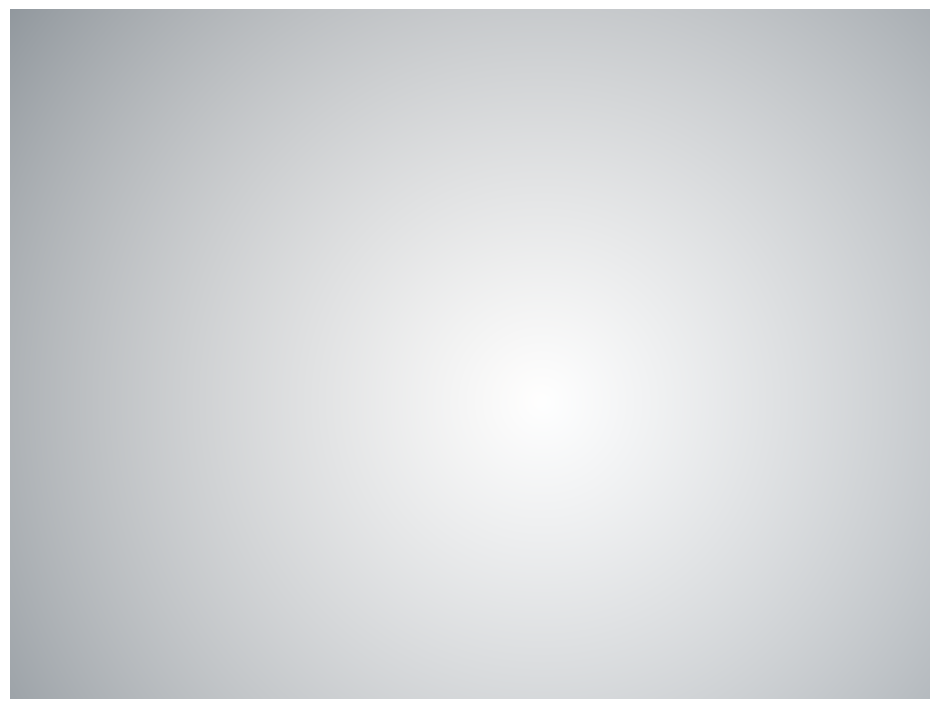

In [2]:
constant = colour.utilities.ones([3000, 4000, 3])
image = np.copy(constant)

image[..., 0] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 0], (2.0, 2.0), (0.450, 0.425)
)
image[..., 1] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 1], (2.1, 2.1), (0.450, 0.425)
)
image[..., 2] = colour_hdri.distortion.apply_radial_gradient(
    image[..., 2], (2.2, 2.2), (0.450, 0.425)
)

colour.plotting.plot_image(colour.cctf_encoding(image));

## 2D Function

### Vignette Characterisation

In [3]:
characterisation_data = colour_hdri.characterise_vignette(image, method="2D Function")

print(characterisation_data.parameters)
print(characterisation_data.principal_point)

[[-3.19143844 -0.05296161  0.9        -2.12211248 -0.09980934  0.9       ]
 [-2.99141148 -0.02880998  0.9        -1.97970964 -0.081436    0.9       ]
 [-2.80965382 -0.00688923  0.9        -1.85058453 -0.06477854  0.9       ]]
[ 0.56982046  0.57861647]


### Vignette Correction

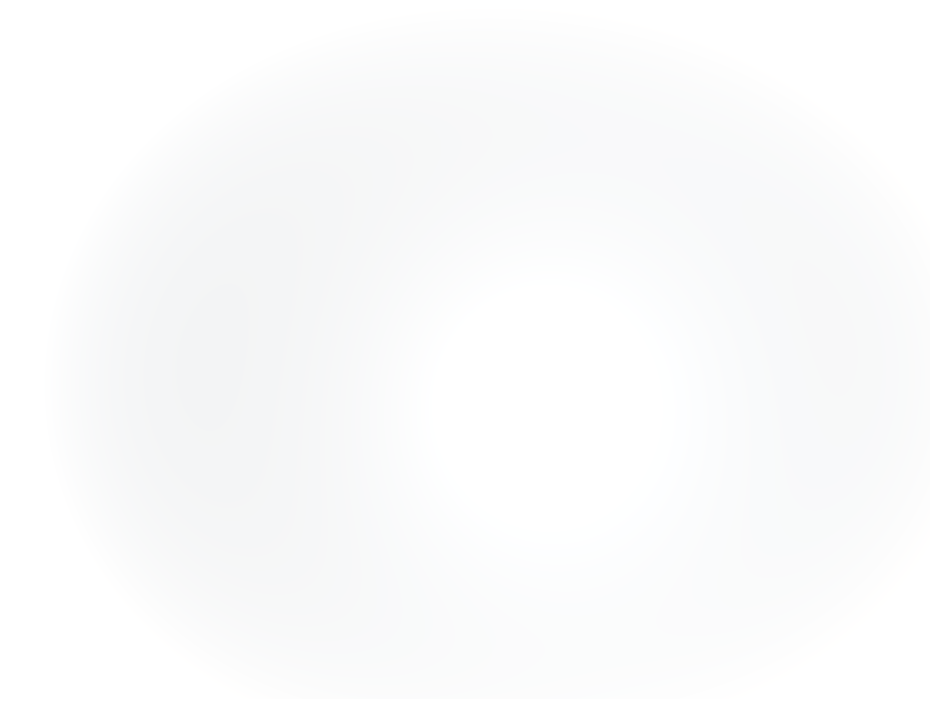

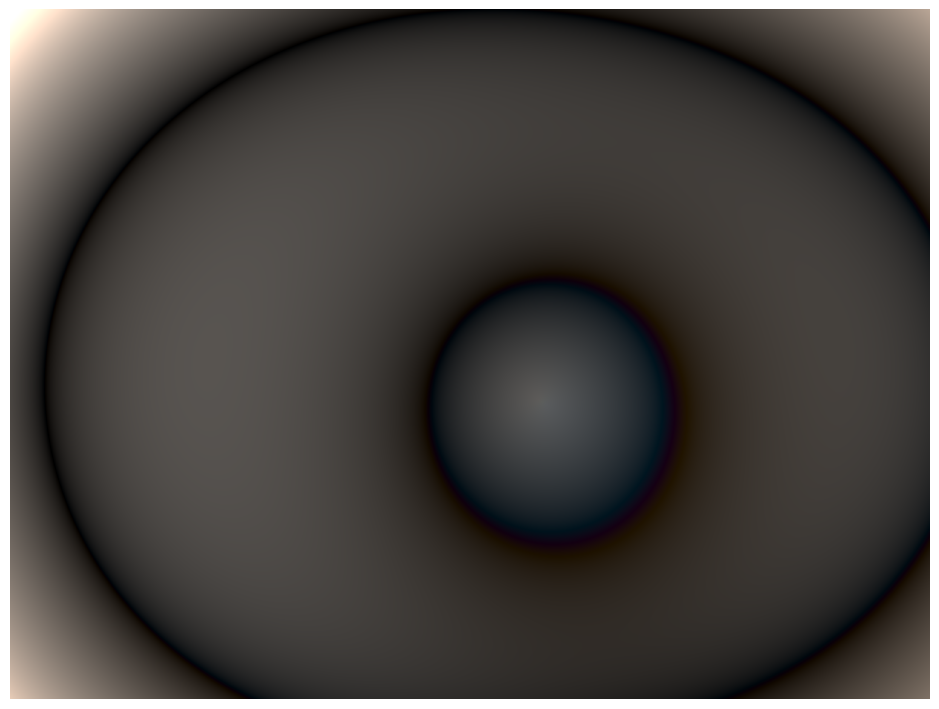

In [4]:
corrected = colour_hdri.correct_vignette(
    image, characterisation_data, method="2D Function"
)

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));

# Bivariate Spline

## Vignette Characterisation

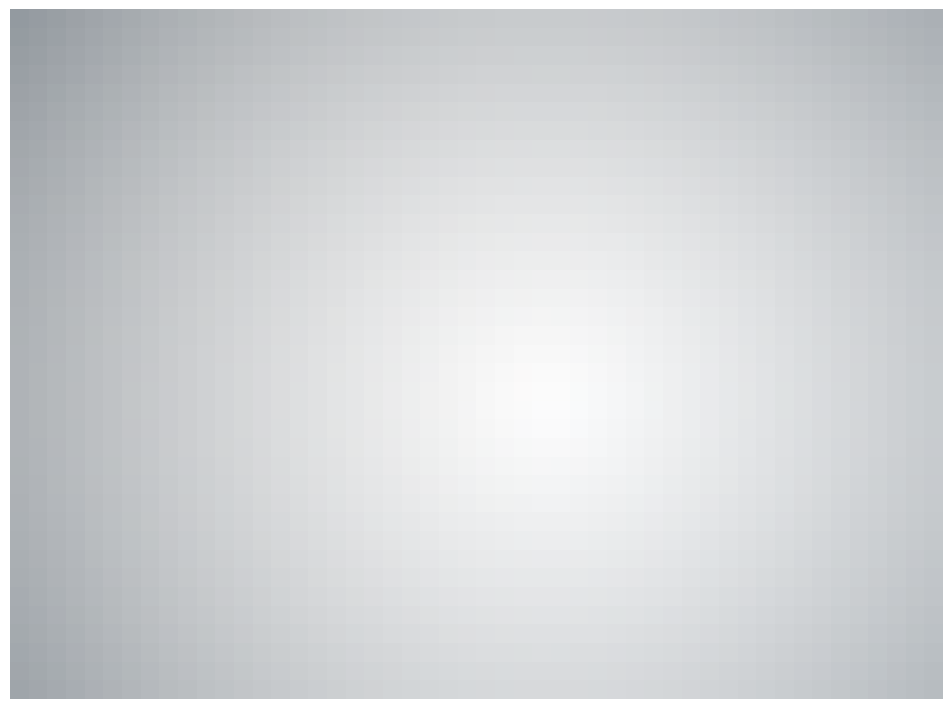

In [5]:
characterisation_data = colour_hdri.characterise_vignette(
    image, method="Bivariate Spline"
)

colour.plotting.plot_image(colour.cctf_encoding(characterisation_data.parameters));

### Vignette Correction


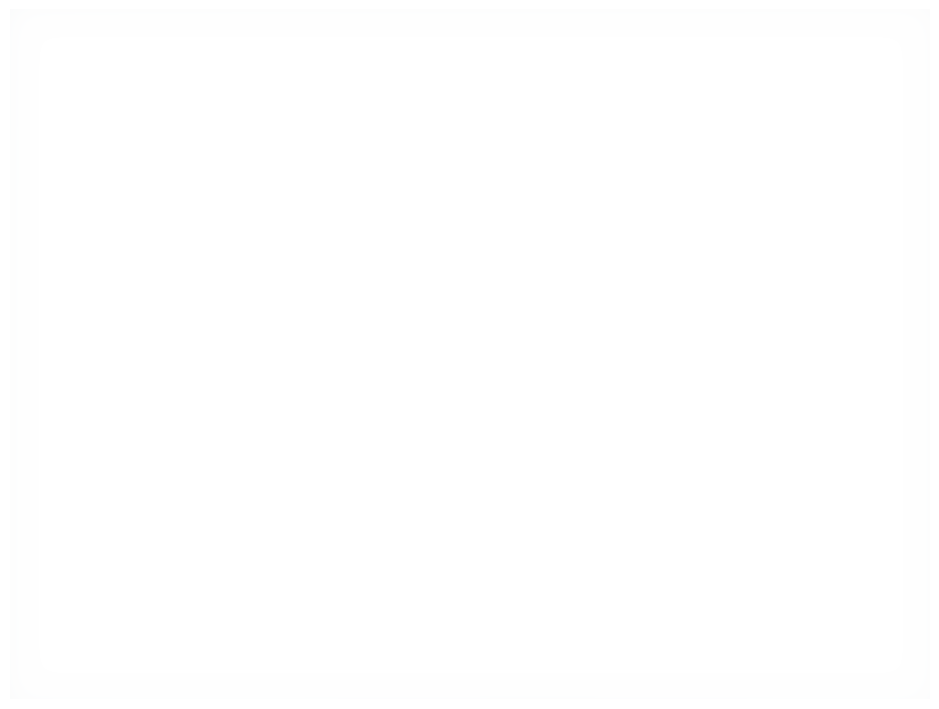

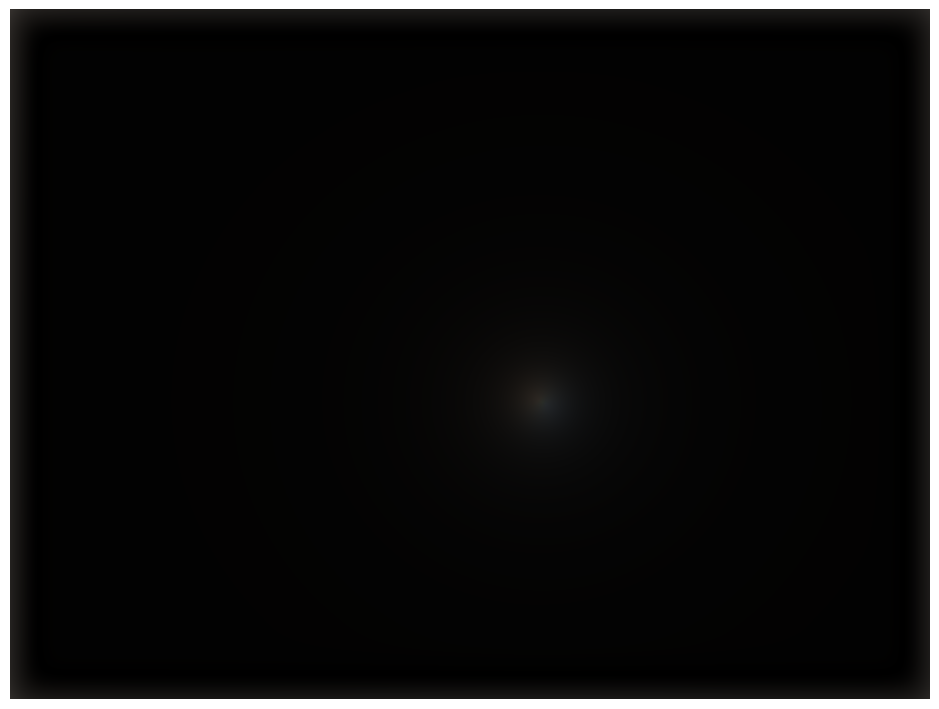

In [6]:
corrected = colour_hdri.correct_vignette(
    image, characterisation_data, method="Bivariate Spline"
)

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));

## Radial Basis Functions

## Vignette Characterisation

In [7]:
characterisation_data = colour_hdri.characterise_vignette(image, method="RBF")

print(characterisation_data.parameters)

[[ 0.44468027  0.46683683  0.48697909]
 [ 0.58306268  0.60720005  0.62914292]
 [ 0.53228483  0.55538528  0.57634753]
 [ 0.48671718  0.50921236  0.52963417]
 [ 0.2864891   0.31617844  0.3431687 ]
 [ 0.33785729  0.36510483  0.3898752 ]
 [ 0.37975672  0.40508398  0.42810762]
 [ 0.40921028  0.43330693  0.4552094 ]
 [ 0.42430456  0.44796761  0.46947199]
 [ 0.42480883  0.44878708  0.47057381]
 [ 0.41568981  0.44044499  0.46293443]
 [ 0.39807485  0.42404069  0.44762761]
 [ 0.37269438  0.40024876  0.42527751]
 [ 0.34097546  0.37040598  0.39713891]
 [ 0.40048262  0.42985732  0.45653185]
 [ 0.46263971  0.48956641  0.51401403]
 [ 0.51520635  0.54024387  0.56297479]
 [ 0.55350731  0.57739885  0.59909228]
 [ 0.57368025  0.59727117  0.6186993 ]
 [ 0.57436146  0.59839518  0.62023382]
 [ 0.56211686  0.58701995  0.60965444]
 [ 0.53887411  0.56505196  0.58884864]
 [ 0.50620298  0.53400412  0.55927778]
 [ 0.46648652  0.49617525  0.52316485]
 [ 0.38433357  0.40942122  0.43222732]
 [ 0.4700991   0.49128288

In [8]:
figure, axes = colour.plotting.plot_image(colour.cctf_encoding(image), standalone=False)

sampling_coordinates = colour_hdri.distortion.vignette.vignette_sampling_coordinates(
    characterisation_data.principal_point,
    image.shape[1] / image.shape[0],
)

axes.scatter(
    sampling_coordinates[..., 0] * image.shape[1],
    sampling_coordinates[..., 1] * image.shape[0],
);

## Vignette Correction

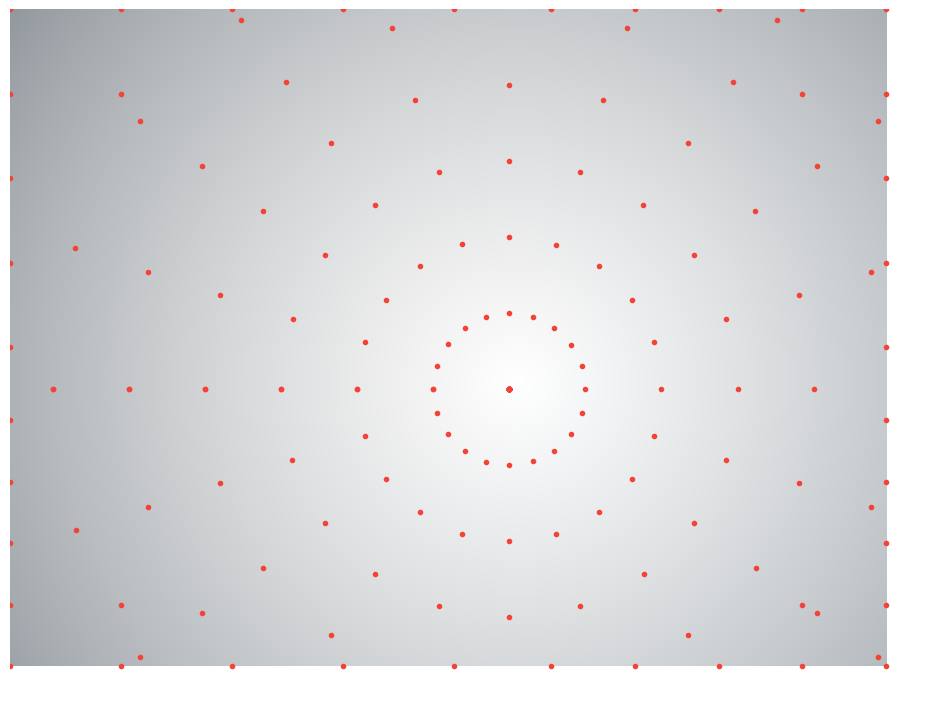

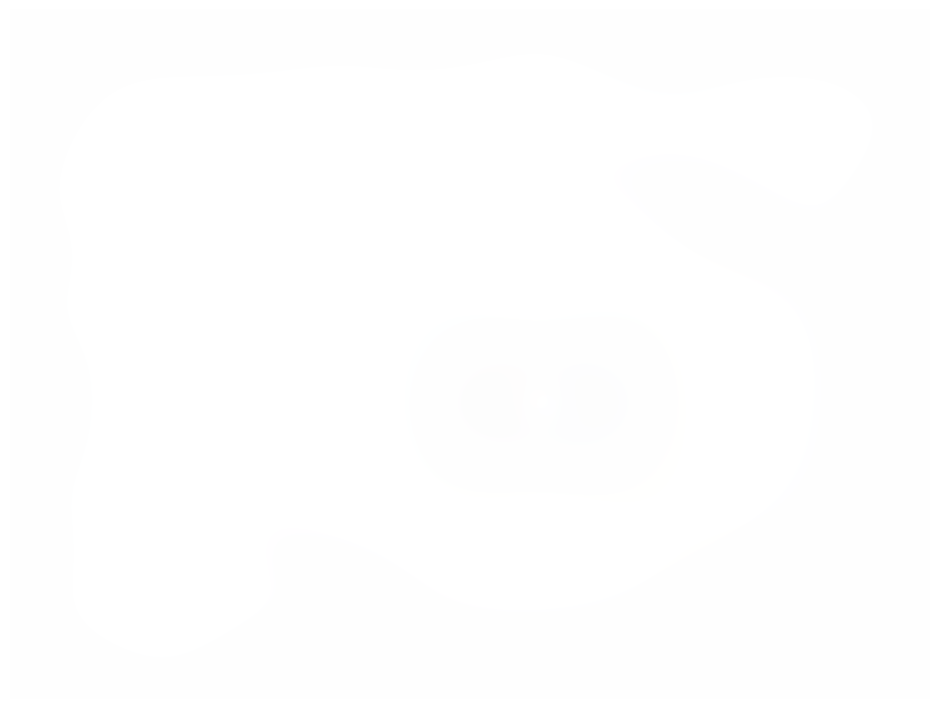

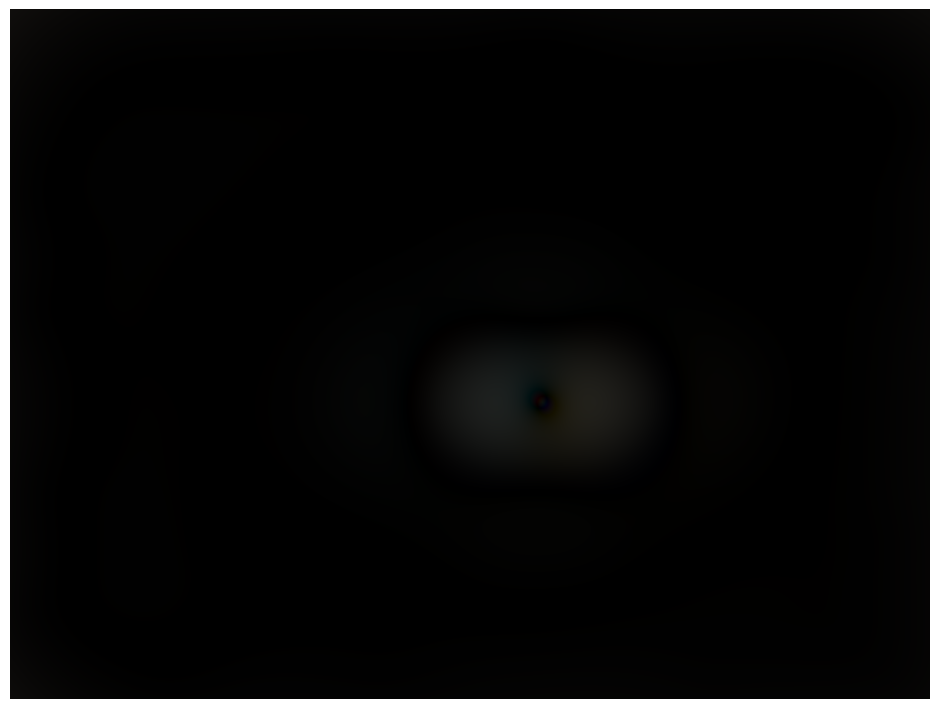

In [9]:
corrected = colour_hdri.correct_vignette(image, characterisation_data, method="RBF")

colour.plotting.plot_image(colour.cctf_encoding(corrected))

colour.plotting.plot_image(colour.cctf_encoding(np.abs(constant - corrected)));